In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] limma_3.50.3          forcats_0.5.2         stringr_1.5.0        
 [4] dplyr_1.1.0           purrr_1.0.1           readr_2.1.3          
 [7] tidyr_1.3.0           tibble_3.1.7          ggplot2_3.3.6        
[10] tidyverse_1.3.2       AnnotationDbi_1.56.2  IRanges_2.28.0       


In [1]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(limma)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [3]:
# load in data to be used
load(file = "pairwise_RData_files/pairwise_WGCNA_ADNI_allSubjects-01-dataInput.RData")

In [4]:
ls()

[1] "datExpr_CN_AD.gender_rin_corrected"  "datExpr_CN_MCI.gender_rin_corrected"
[3] "datExpr_MCI_AD.gender_rin_corrected" "datTraits_CN_AD"                    
[5] "datTraits_CN_MCI"                    "datTraits_MCI_AD"

## Filter datExpr by highly variable genes

In [5]:
datExpr_CN_MCI_variance <- data.frame(matrix(nrow = ncol(datExpr_CN_MCI.gender_rin_corrected), ncol = 1))
rownames(datExpr_CN_MCI_variance) <- colnames(datExpr_CN_MCI.gender_rin_corrected)
colnames(datExpr_CN_MCI_variance)  <- "Variance"

datExpr_CN_MCI_variance["Variance"] <- lapply(datExpr_CN_MCI.gender_rin_corrected, var) %>% unlist
datExpr_CN_MCI_variance$gene <- rownames(datExpr_CN_MCI_variance)

datExpr_CN_MCI_variance %>% head

,Variance,gene
,<dbl>,<chr>
11715100_at,0.03417823,11715100_at
11715101_s_at,0.04196506,11715101_s_at
11715102_x_at,0.02833113,11715102_x_at
11715103_x_at,0.07224683,11715103_x_at
11715104_s_at,0.02321430,11715104_s_at
11715105_at,0.02096909,11715105_at


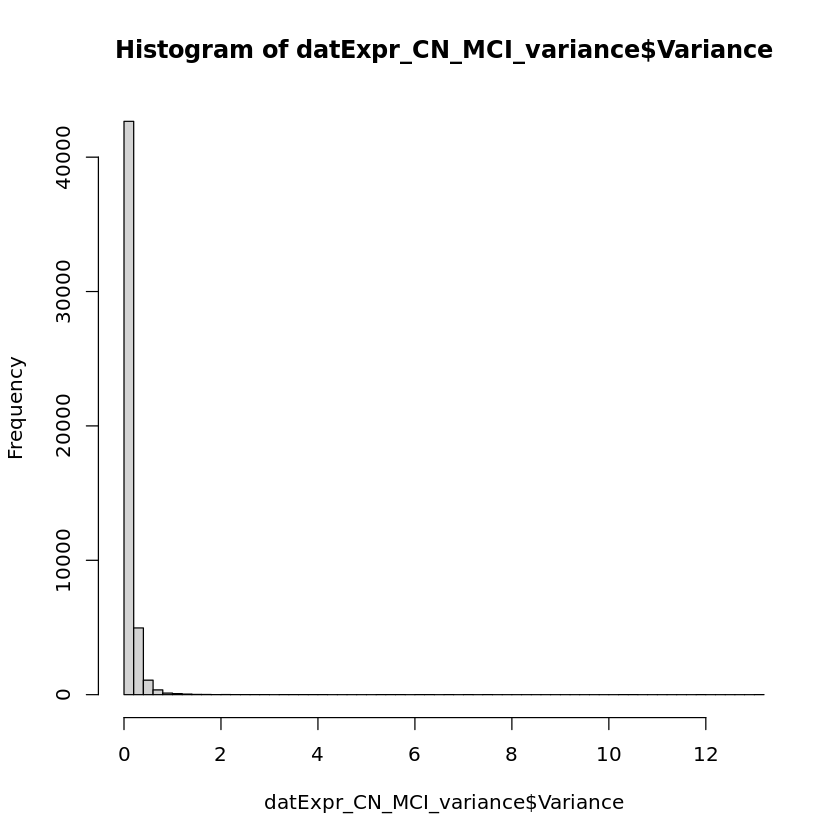

In [6]:
hist(datExpr_CN_MCI_variance$Variance, breaks = 50)

In [7]:
# identify top 20000 highly variable genes based on variance
datExpr_CN_MCI_HVGs <- (datExpr_CN_MCI_variance[order(datExpr_CN_MCI_variance$Variance, decreasing = TRUE), ])[1:20000,]
datExpr_CN_MCI_HVGs %>% head

# select HVGs from datExpr
datExpr_CN_MCI_selectHVGs <- datExpr_CN_MCI.gender_rin_corrected[, rownames(datExpr_CN_MCI_HVGs)]
datExpr_CN_MCI_selectHVGs %>% head

,Variance,gene
,<dbl>,<chr>
11756083_x_at,13.112118,11756083_x_at
11732801_at,11.983462,11732801_at
11755998_x_at,10.587904,11755998_x_at
11760799_x_at,10.258379,11760799_x_at
11732800_a_at,7.487605,11732800_a_at
11752660_a_at,7.101282,11752660_a_at


,11756083_x_at,11732801_at,11755998_x_at,11760799_x_at,11732800_a_at,11752660_a_at,11734979_at,11732901_a_at,11762641_x_at,11715316_x_at,⋯,11756211_s_at,11747006_a_at,11761860_x_at,11722775_a_at,11715405_x_at,11760672_at,11758172_s_at,11719427_a_at,11723768_a_at,11729589_a_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,2.124926,10.390598,5.506571,4.101654,8.667923,8.602035,3.424397,3.469096,8.177795,10.014404,⋯,7.273317,2.529163,3.699183,6.704043,3.240515,3.009081,7.613445,7.586409,6.296350,3.355540
037_S_4410,1.918156,1.580957,9.928333,4.088478,1.743597,1.566039,3.100372,3.617514,8.281968,11.678029,⋯,8.239146,2.595652,3.448446,6.251810,3.325437,2.503525,7.477006,7.764270,6.099125,2.974724
116_S_1232,12.104819,1.899093,5.264304,5.482817,1.749957,1.716992,2.738549,2.553086,6.866159,8.402358,⋯,7.756199,2.697247,4.057259,6.257818,3.158844,2.297950,7.704550,7.701108,6.379560,3.312010
099_S_4205,3.252290,2.181264,7.854621,5.206091,1.964495,2.241927,6.865078,5.245001,7.987162,12.042883,⋯,7.958191,3.248313,3.302225,6.429120,3.717243,3.018152,7.658205,7.815174,6.363801,3.410810
007_S_4467,3.623205,1.788643,8.052339,5.469007,1.538620,1.586389,7.775287,2.886151,7.642915,8.304880,⋯,8.164307,2.929167,3.482383,6.089678,3.820691,2.337360,7.009957,7.629036,6.425761,3.692675
128_S_0205,3.471290,8.421264,7.627621,5.098091,7.091495,7.003927,2.029078,5.278001,7.787162,3.952883,⋯,7.547191,2.682313,3.989225,6.095120,2.804243,2.255152,7.145205,7.645174,6.328801,3.270810


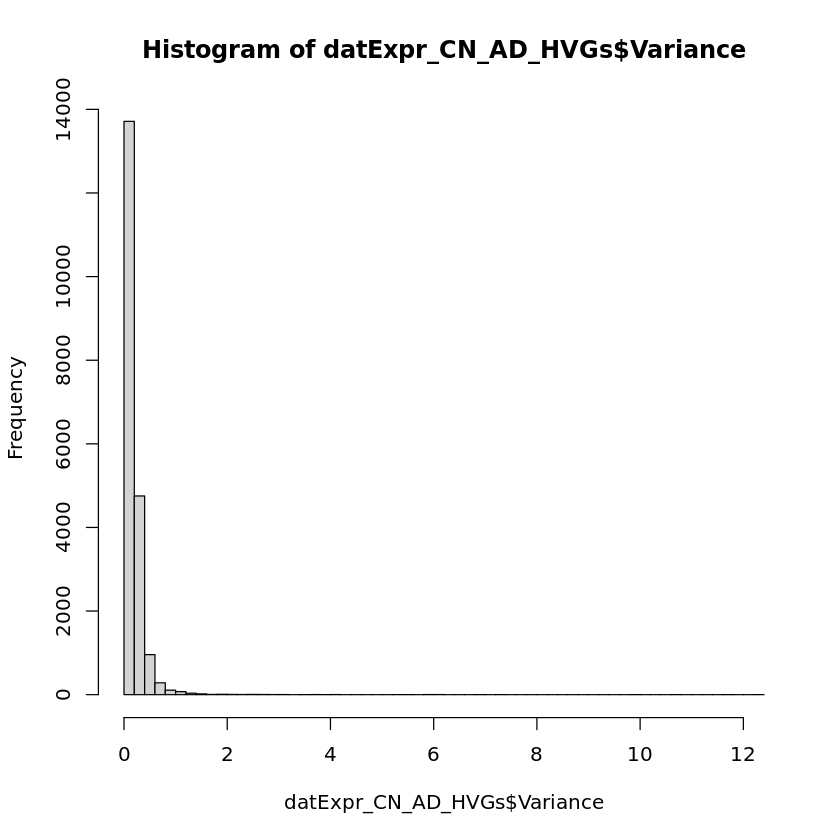

In [14]:
hist(datExpr_CN_MCI_HVGs$Variance, breaks = 50)

In [8]:
# save HVGs as RData
save(datExpr_CN_MCI_selectHVGs, file = "pairwise_RData_files/datExpr_CN_MCI_limmaCorrected_selectHVGs.RData")

In [9]:
# pick soft thresholding power
start <- Sys.time()
# Choose a set of soft-thresholding powers:
powers <- c(c(1:10), seq(from=12, to=20, by=2))
# Call the network topology function
sft <- pickSoftThreshold(datExpr_CN_MCI_selectHVGs, powerVector = powers, verbose = 5)
print(Sys.time() - start)

pickSoftThreshold: will use block size 2236.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 2236 of 20000


Warning message:
“executing %dopar% sequentially: no parallel backend registered”


   ..working on genes 2237 through 4472 of 20000
   ..working on genes 4473 through 6708 of 20000
   ..working on genes 6709 through 8944 of 20000
   ..working on genes 8945 through 11180 of 20000
   ..working on genes 11181 through 13416 of 20000
   ..working on genes 13417 through 15652 of 20000
   ..working on genes 15653 through 17888 of 20000
   ..working on genes 17889 through 20000 of 20000
   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k. max.k.
1      1   0.0164 -0.154          0.908 3280.000  3.10e+03 6620.0
2      2   0.7040 -1.110          0.920  940.000  7.42e+02 3210.0
3      3   0.8220 -1.380          0.931  362.000  2.24e+02 1850.0
4      4   0.8460 -1.490          0.939  167.000  7.72e+01 1190.0
5      5   0.8610 -1.540          0.952   87.200  2.98e+01  814.0
6      6   0.8710 -1.560          0.961   49.600  1.25e+01  584.0
7      7   0.8720 -1.580          0.965   30.100  5.55e+00  432.0
8      8   0.8660 -1.600          0.962   19.100  2.67e+00  327.0
9    

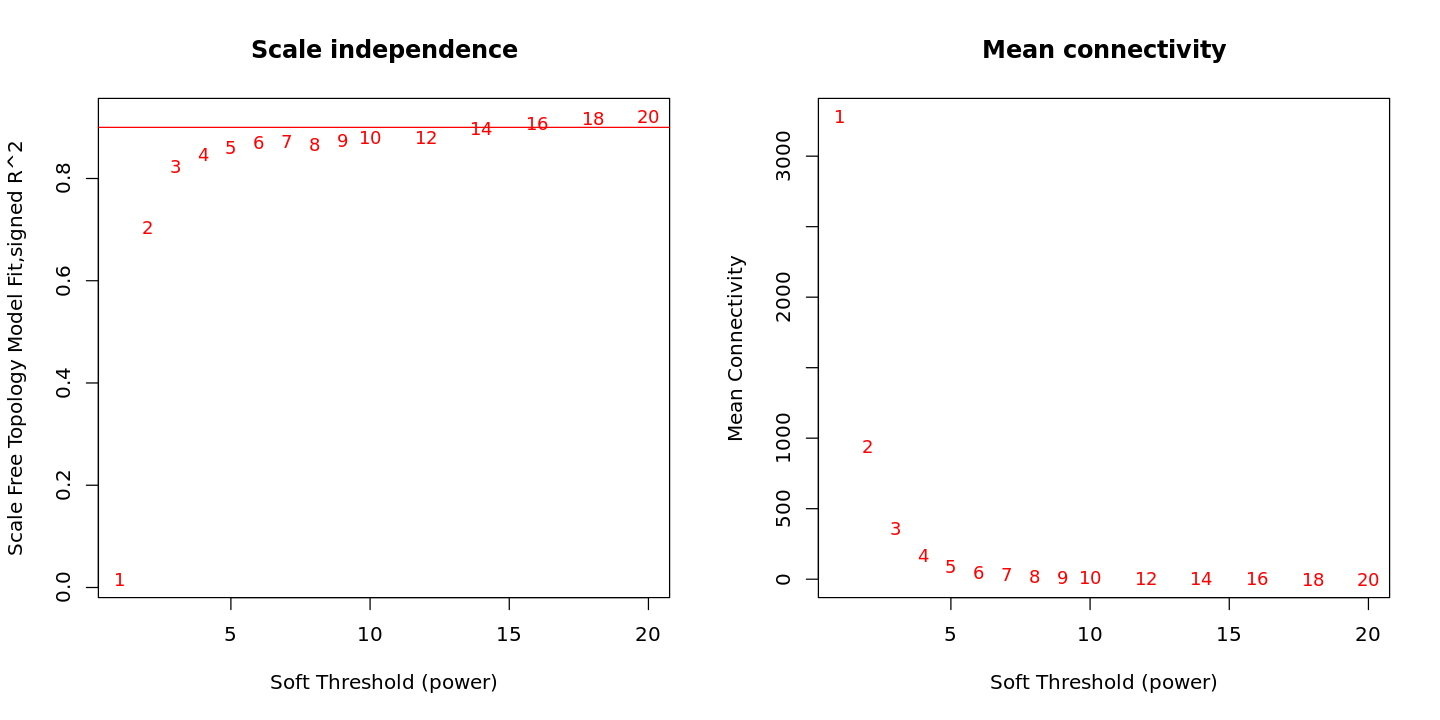

In [10]:
options(repr.plot.width=12, repr.plot.height=6)
# Plot results from soft-thresholding powers
par(mfrow = c(1,2));
cex1 = 0.9;

# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");

# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")

# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

# Trying power = 5

## Co-expression similarity and adjacency

In [11]:
start <- Sys.time()
softPower <- 5
adjacency <- WGCNA::adjacency(datExpr_CN_MCI_selectHVGs, 
                              power = softPower)
print(Sys.time() - start)

Time difference of 29.51864 mins


In [12]:
adjacency %>% head

,11756083_x_at,11732801_at,11755998_x_at,11760799_x_at,11732800_a_at,11752660_a_at,11734979_at,11732901_a_at,11762641_x_at,11715316_x_at,⋯,11756211_s_at,11747006_a_at,11761860_x_at,11722775_a_at,11715405_x_at,11760672_at,11758172_s_at,11719427_a_at,11723768_a_at,11729589_a_at
11756083_x_at,1.000000e+00,1.459227e-08,2.823807e-03,1.623782e-10,1.118142e-08,4.614104e-09,6.716905e-09,1.104839e-10,5.521246e-03,5.083342e-04,⋯,2.606716e-06,1.257578e-08,4.904622e-12,6.437810e-10,1.692758e-08,7.328966e-07,1.821821e-12,8.975084e-08,7.947149e-12,1.506525e-08
11732801_at,1.459227e-08,1.000000e+00,4.181513e-11,1.156807e-09,9.813915e-01,9.794398e-01,1.305017e-09,1.469178e-09,2.232403e-10,1.405640e-07,⋯,1.055768e-06,3.665900e-08,3.000136e-07,2.251789e-06,1.995942e-08,5.287299e-06,5.282237e-05,1.091821e-06,9.516100e-07,1.304251e-07
11755998_x_at,2.823807e-03,4.181513e-11,1.000000e+00,3.839913e-06,1.487989e-10,7.547609e-11,8.598066e-09,1.148194e-05,2.146081e-02,1.506320e-05,⋯,5.520235e-08,3.577704e-08,1.495378e-05,2.621414e-07,7.860240e-13,6.539321e-08,9.924579e-09,1.057505e-07,9.615298e-08,6.853883e-06
11760799_x_at,1.623782e-10,1.156807e-09,3.839913e-06,1.000000e+00,1.854227e-09,4.265796e-09,1.086665e-10,9.321928e-08,8.526365e-06,1.319841e-07,⋯,1.211777e-09,1.268321e-07,1.003767e-08,1.652820e-07,1.072615e-10,2.576596e-07,5.838145e-07,6.801718e-08,3.352761e-08,7.390591e-09
11732800_a_at,1.118142e-08,9.813915e-01,1.487989e-10,1.854227e-09,1.000000e+00,9.900003e-01,9.199744e-10,9.071035e-10,3.942599e-11,8.157683e-08,⋯,2.698293e-06,8.411213e-08,3.650065e-07,9.207504e-07,4.025539e-08,4.489379e-06,8.362032e-05,1.068511e-06,2.300606e-06,1.073885e-07
11752660_a_at,4.614104e-09,9.794398e-01,7.547609e-11,4.265796e-09,9.900003e-01,1.000000e+00,7.177646e-10,1.095418e-09,6.292744e-11,5.879202e-08,⋯,2.454200e-06,5.734703e-08,3.821621e-07,1.155507e-06,3.052013e-08,4.670552e-06,8.185200e-05,1.317933e-06,2.199983e-06,2.402311e-07


In [13]:
# save output so I don't have to keep loading the whole workspace
adjacency_CN_MCI <- adjacency
save(adjacency_CN_MCI, file = "pairwise_RData_files/20230418_adjacency_CN_MCI.RData")

## Topological overlap matrix

In [14]:
# Turn adjacency into topological overlap
start <- Sys.time()
TOM = TOMsimilarity(adjacency);
dissTOM = 1-TOM 
print( Sys.time() - start )

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.
Time difference of 40.50517 secs


In [15]:
dissTOM_CN_MCI <- dissTOM
save(dissTOM_CN_MCI, file = "pairwise_RData_files/20230418_dissTOM_CN_MCI.RData")

## Clustering using TOM

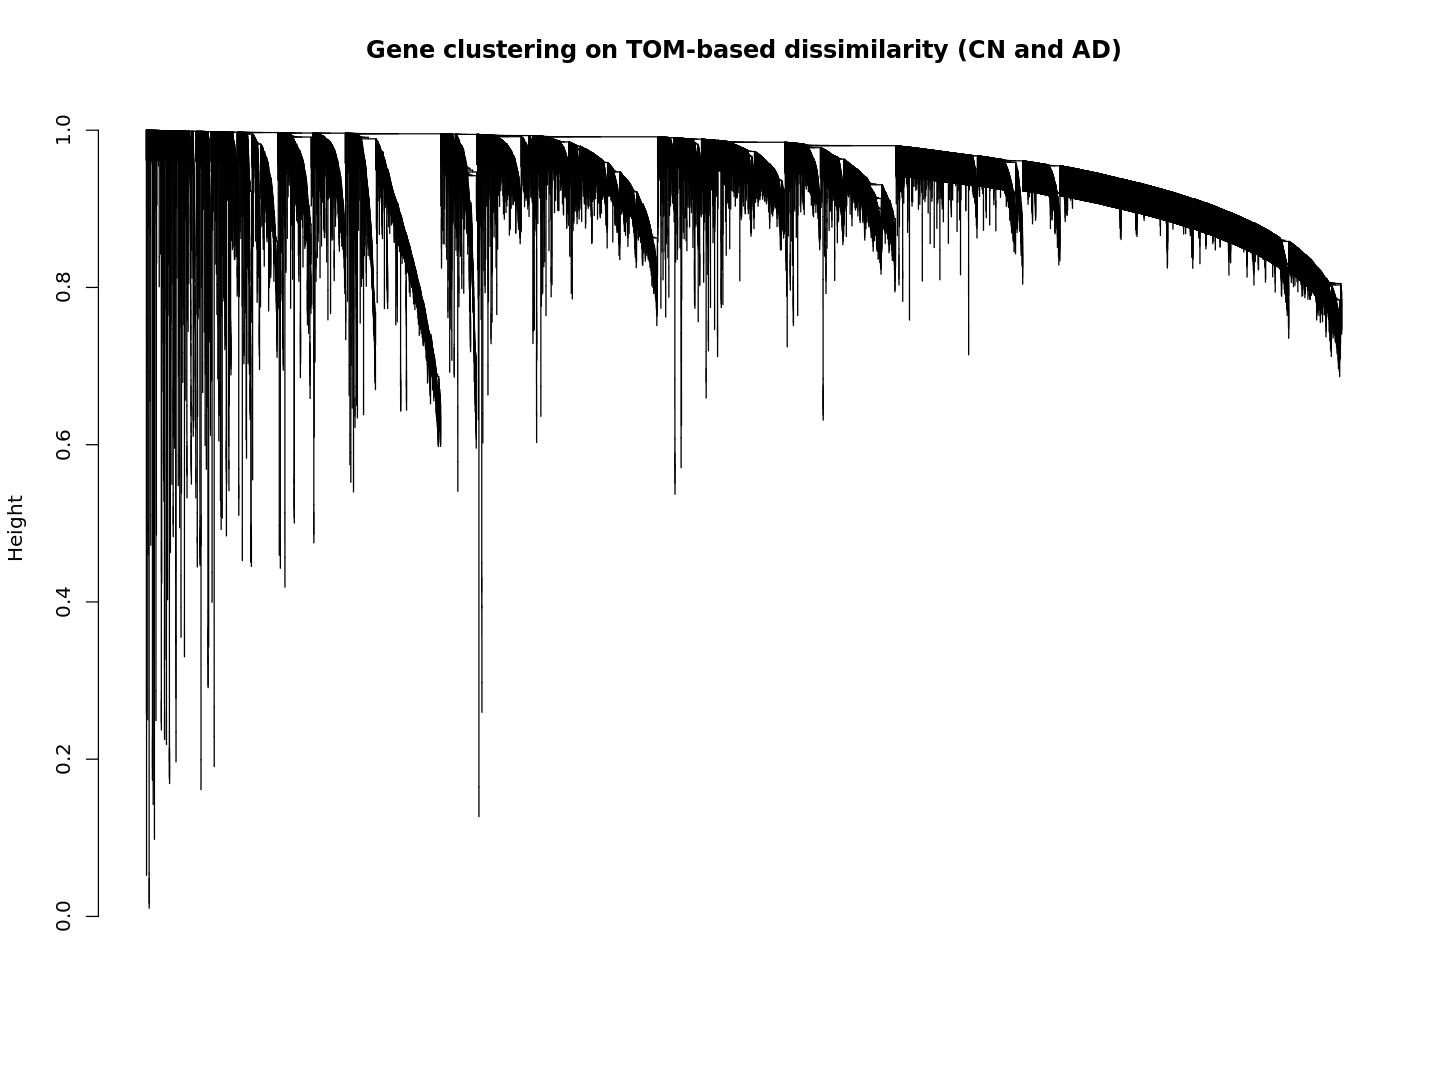

In [16]:
# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");

# Plot the resulting clustering tree (dendrogram)
options(repr.plot.width = 12, repr.plot.height = 9)
plot(geneTree, xlab="", sub="", 
     main = "Gene clustering on TOM-based dissimilarity (CN and AD)",
     labels = FALSE, hang = 0.04);

In [17]:
# We like large modules, so we set the minimum module size relatively high:
minModuleSize = 30;
# Module identification using dynamic tree cut:
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
                            deepSplit = 2, pamRespectsDendro = FALSE,
                            minClusterSize = minModuleSize);
table(dynamicMods) # 31 modules

 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 226 7783 2627 1269 1133  955  797  564  543  507  500  395  321  251  199  198 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 184  168  168  160  152  139  108  104  101   90   76   75   62   62   53   30 

dynamicColors
        black          blue         brown          cyan     darkgreen 
          564          2627          1269           199           108 
     darkgrey    darkorange       darkred darkturquoise         green 
          101            76           139           104           955 
  greenyellow          grey        grey60     lightcyan    lightgreen 
          395           226           168           184           168 
  lightyellow       magenta  midnightblue        orange paleturquoise 
          160           507           198            90            30 
         pink        purple           red     royalblue   saddlebrown 
          543           500           797           152            62 
       salmon       skyblue     steelblue           tan     turquoise 
          251            62            53           321          7783 
        white        yellow 
           75          1133 

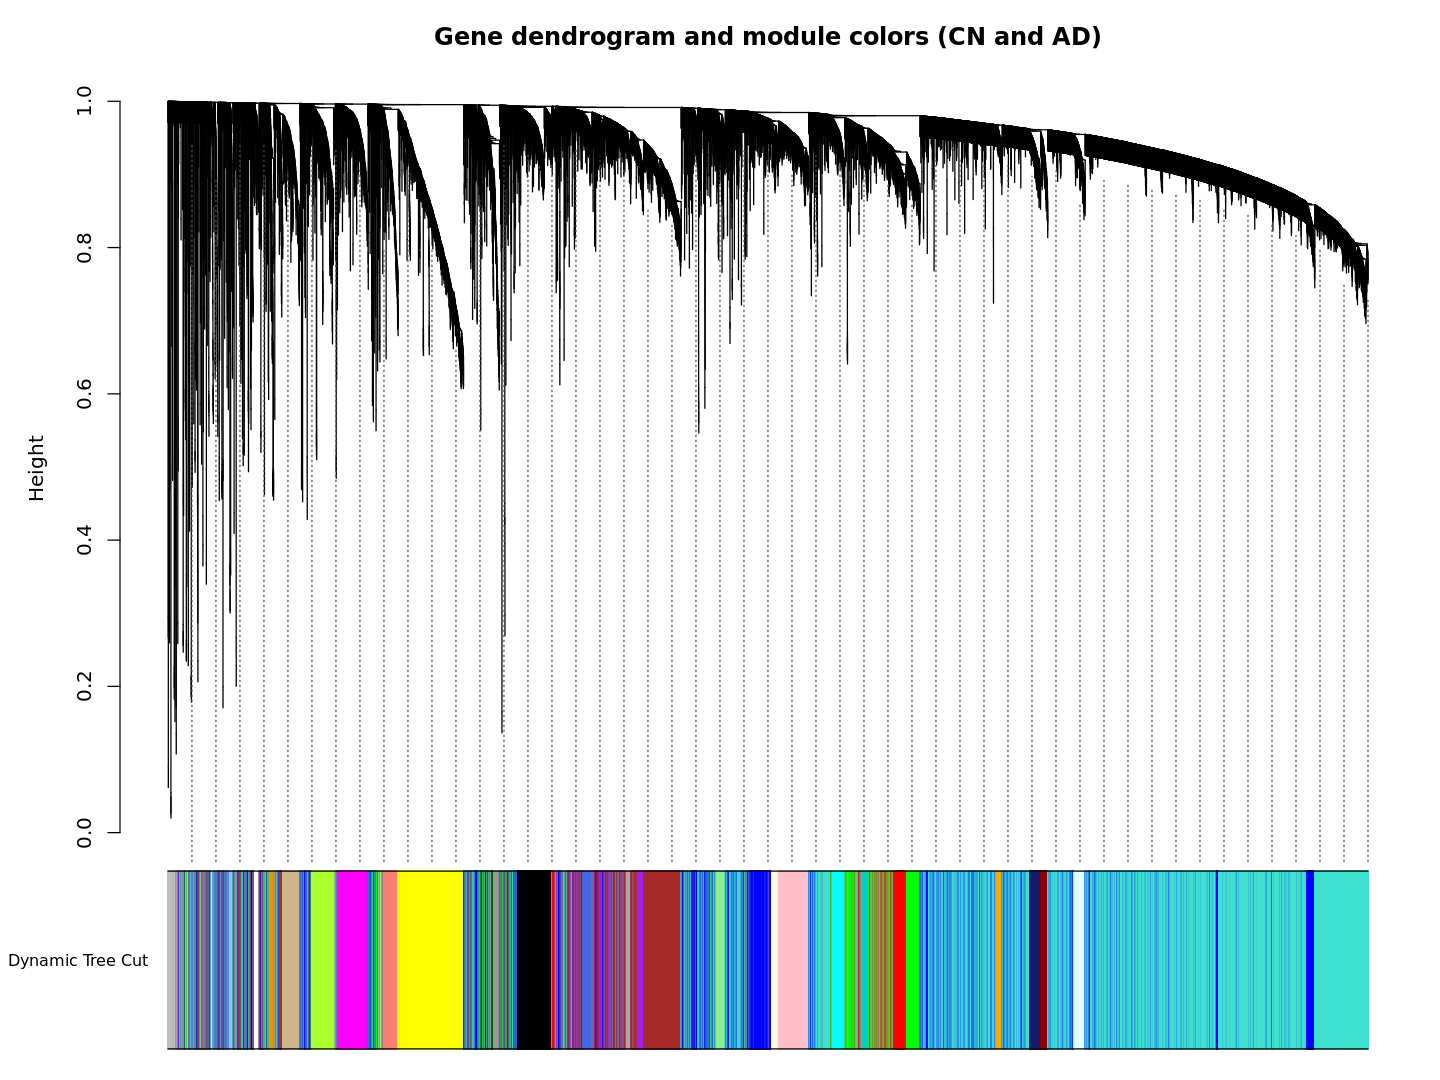

In [18]:
# Convert numeric lables into colors
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)
# Plot the dendrogram and colors underneath
#sizeGrWindow(8,6)
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors (CN and AD)")

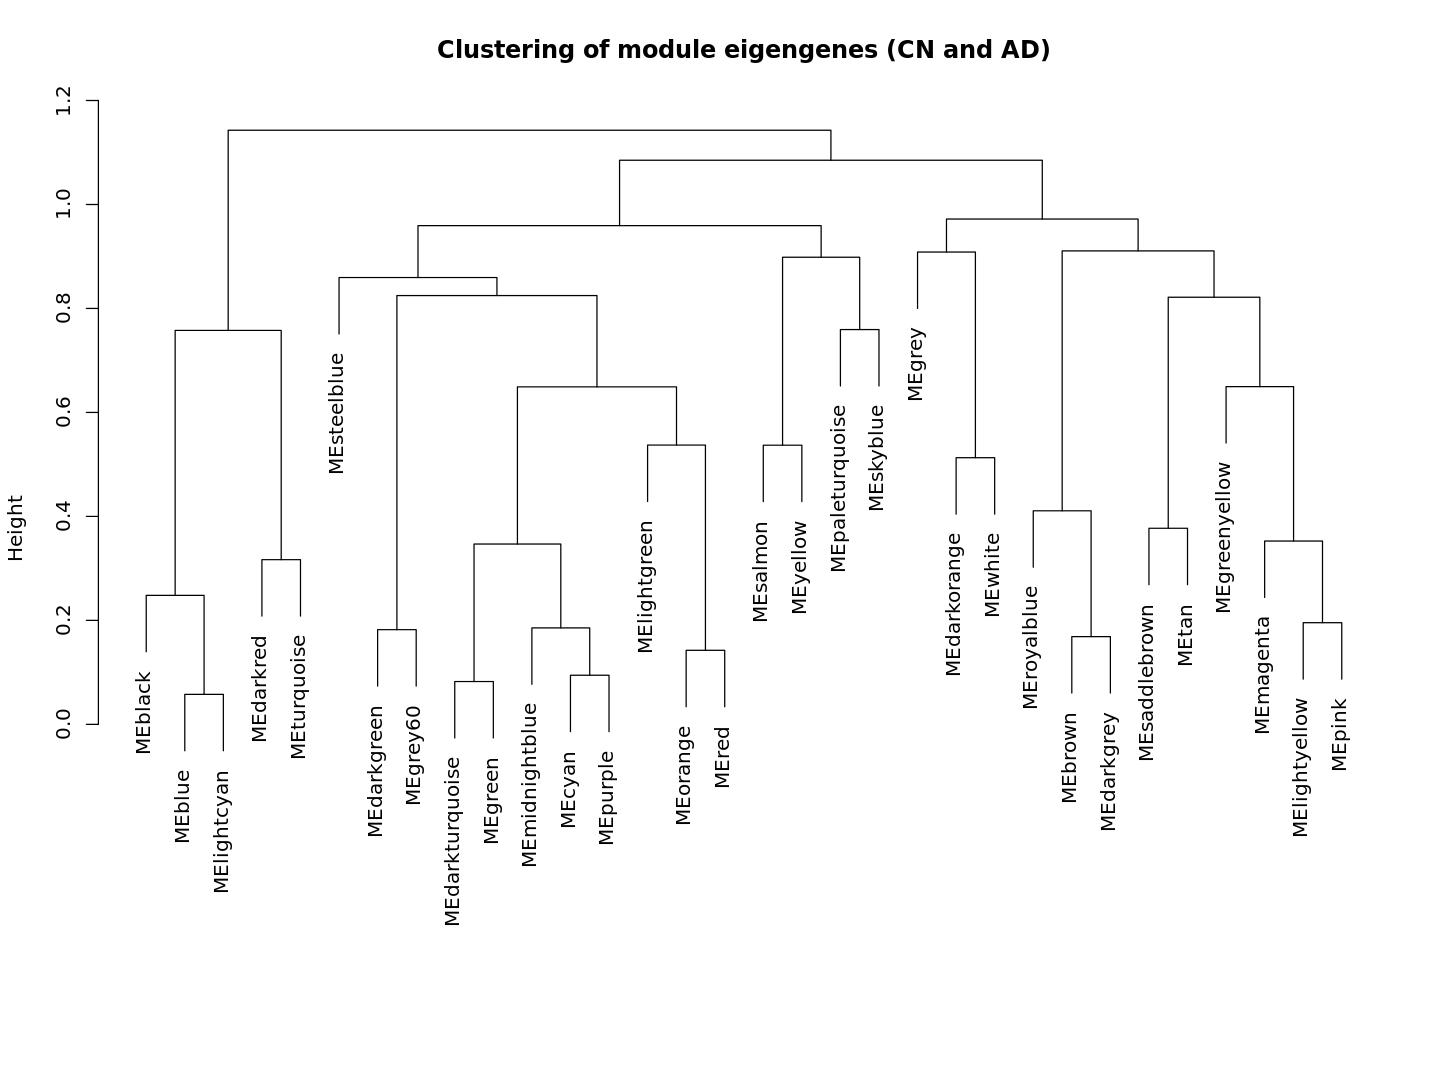

In [19]:
# Calculate eigengenes
MEList = moduleEigengenes(datExpr_CN_MCI_selectHVGs, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");
# Plot the result
# sizeGrWindow(7, 6)
plot(METree, main = "Clustering of module eigengenes (CN and AD)",
     xlab = "", sub = "")

## Merge modules with similar expression profiles

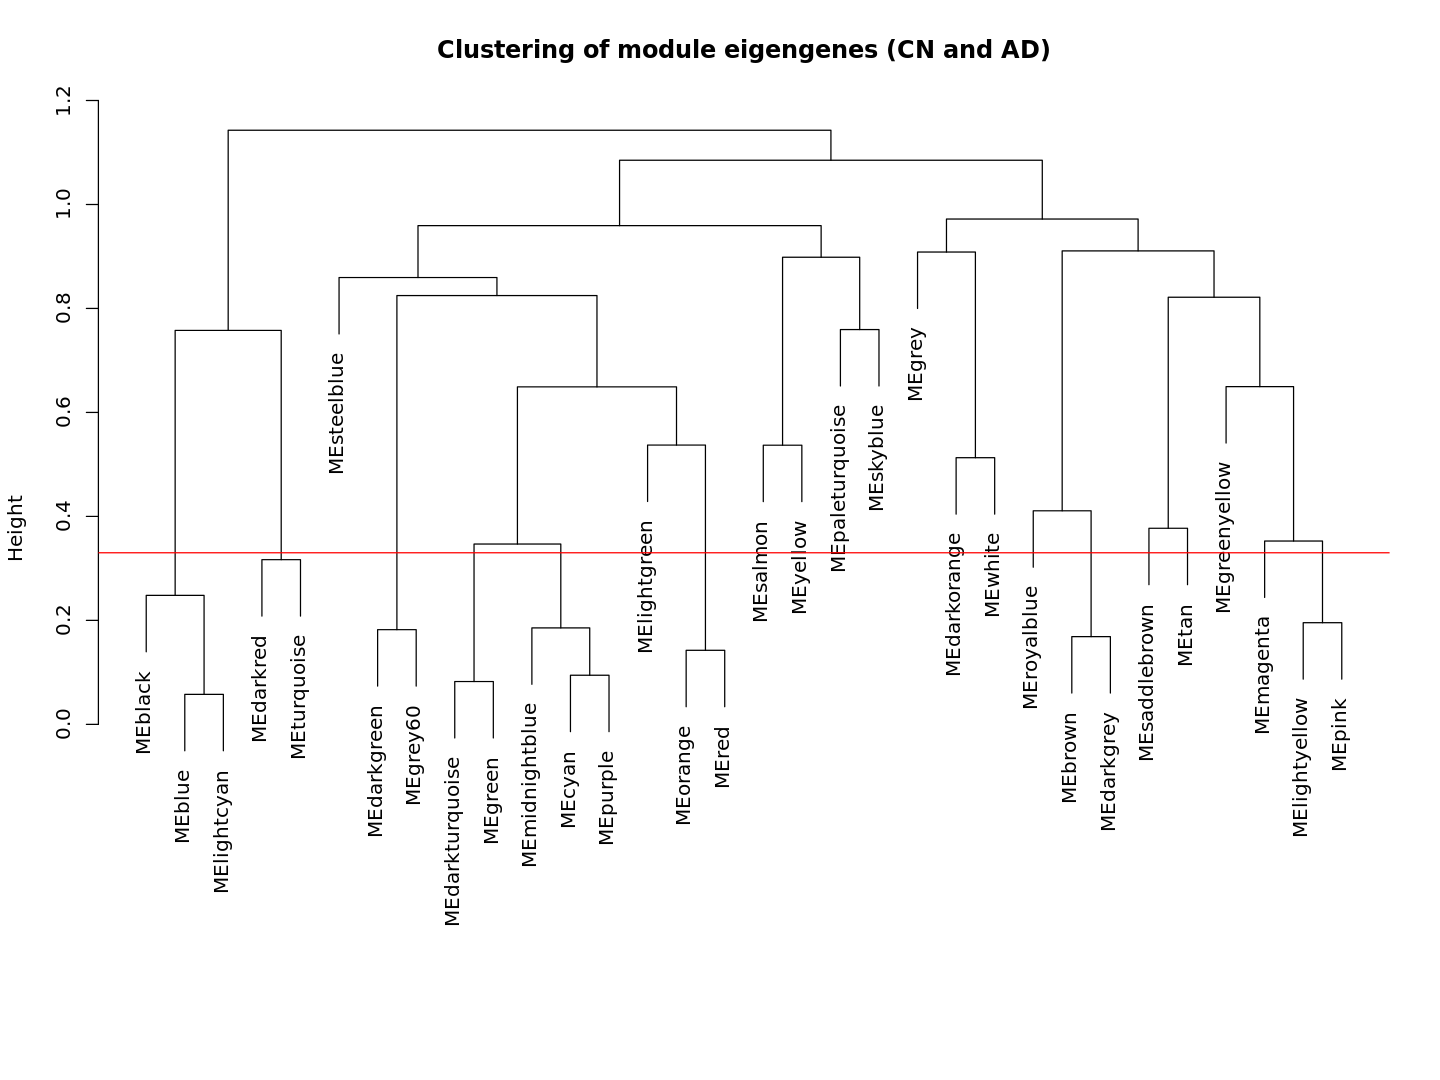

In [30]:
options(repr.plot.width = 12, repr.plot.height = 9)

plot(METree, main = "Clustering of module eigengenes (CN and AD)",
     xlab = "", sub = "")

MEDissThres = 0.33
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

In [35]:
pdf(file = "pairwise_plots/merge_modules_CN_MCI_limmaCorrected.pdf", width = 12, height = 9)

plot(METree, main = "Clustering of module eigengenes (CN and AD)",
     xlab = "", sub = "")

MEDissThres = 0.3

# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

dev.off()

png 
  2

In [36]:
# Call an automatic merging function
start <- Sys.time()
merge = mergeCloseModules(datExpr_CN_MCI_selectHVGs, dynamicColors, 
                          cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs;
print(Sys.time() - start)

 mergeCloseModules: Merging modules whose distance is less than 0.3
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 32 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 23 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 21 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 21 module eigengenes in given set.
Time difference of 24.44358 secs


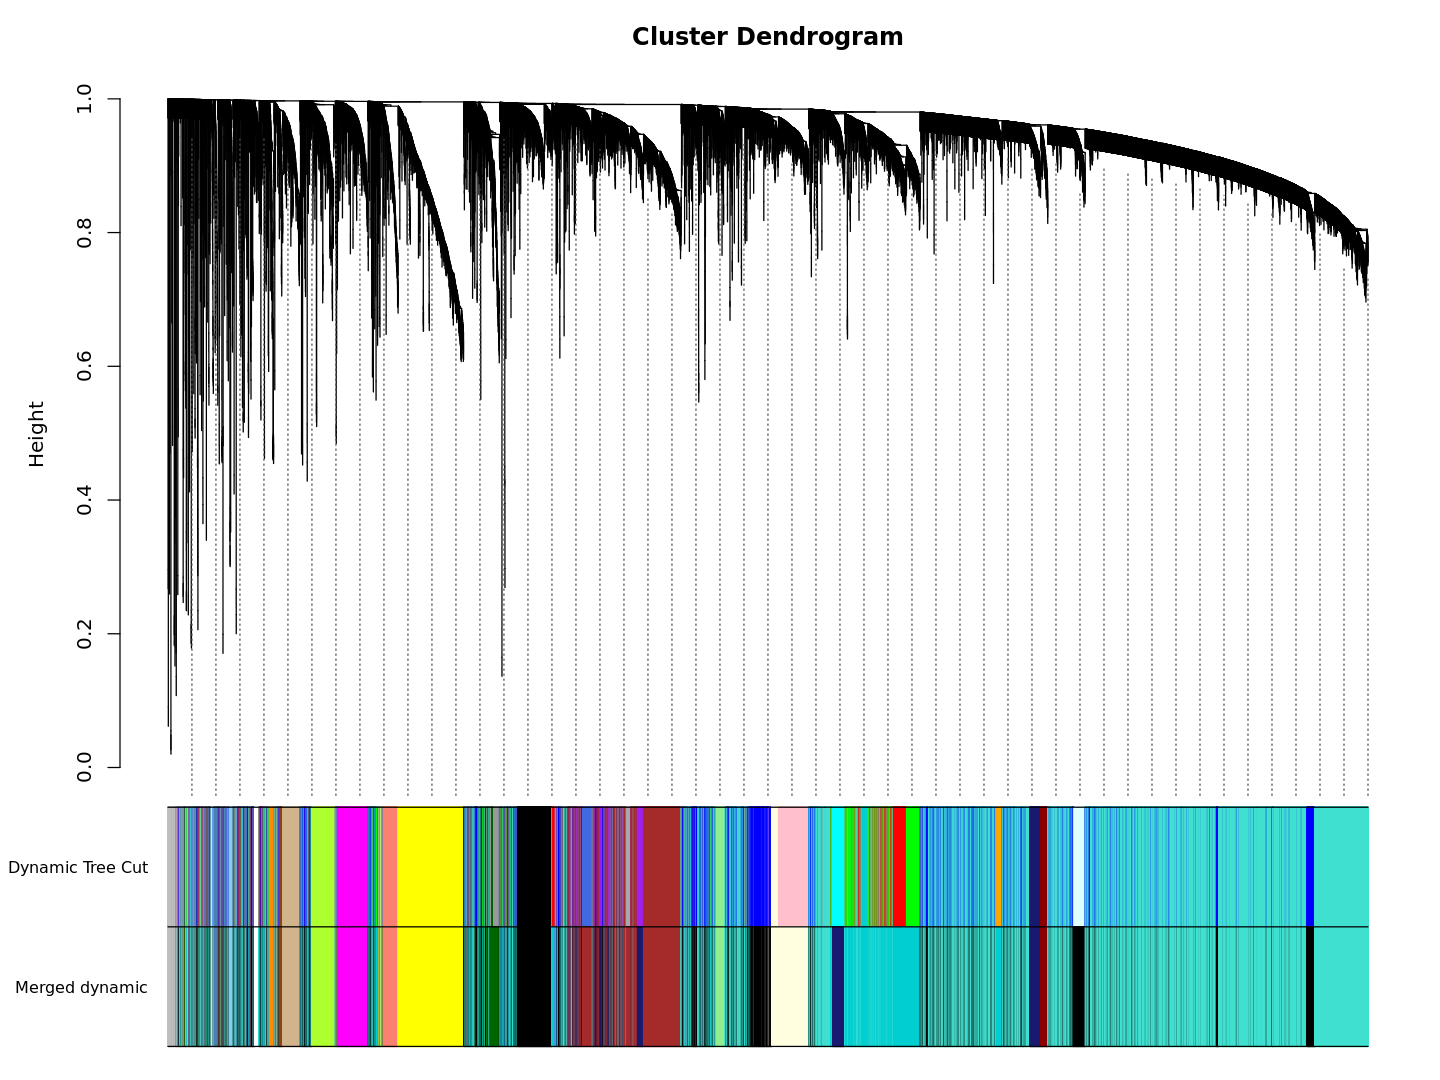

In [37]:
options(repr.plot.width = 12, repr.plot.height = 9)
# sizeGrWindow(12, 9)
#pdf(file = "Plots/geneDendro-3.pdf", wi = 9, he = 6)
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
#dev.off()

In [38]:
pdf(file = "pairwise_plots/CN_MCI_limmaCorrected_geneDendro-3.pdf", wi = 12, he = 9)
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
dev.off()

png 
  2

In [39]:
# Rename to moduleColors
moduleColors_CN_MCI = mergedColors
# Construct numerical labels corresponding to the colors
colorOrder = c("grey", standardColors(50));
moduleLabels_CN_MCI = match(moduleColors_CN_MCI, colorOrder)-1;
MEs_CN_MCI = mergedMEs;
geneTree_CN_MCI = geneTree;

# Save module colors and labels for use in subsequent parts
save(MEs_CN_MCI, moduleLabels_CN_MCI, moduleColors_CN_MCI, geneTree_CN_MCI, file = "pairwise_RData_files/20230418_CN_MCI_limmaCorrected-02-networkConstruction-stepByStep.RData")